In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_95500/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.regression.linear_model as smlm
from patsy import dmatrix
from scipy.stats import norm, chi2
import sys
sys.path.append('../modules')
import choixglmstats

In [3]:
artere = pd.read_csv('../donnees/artere.txt', header=0, index_col=0, sep=' ')

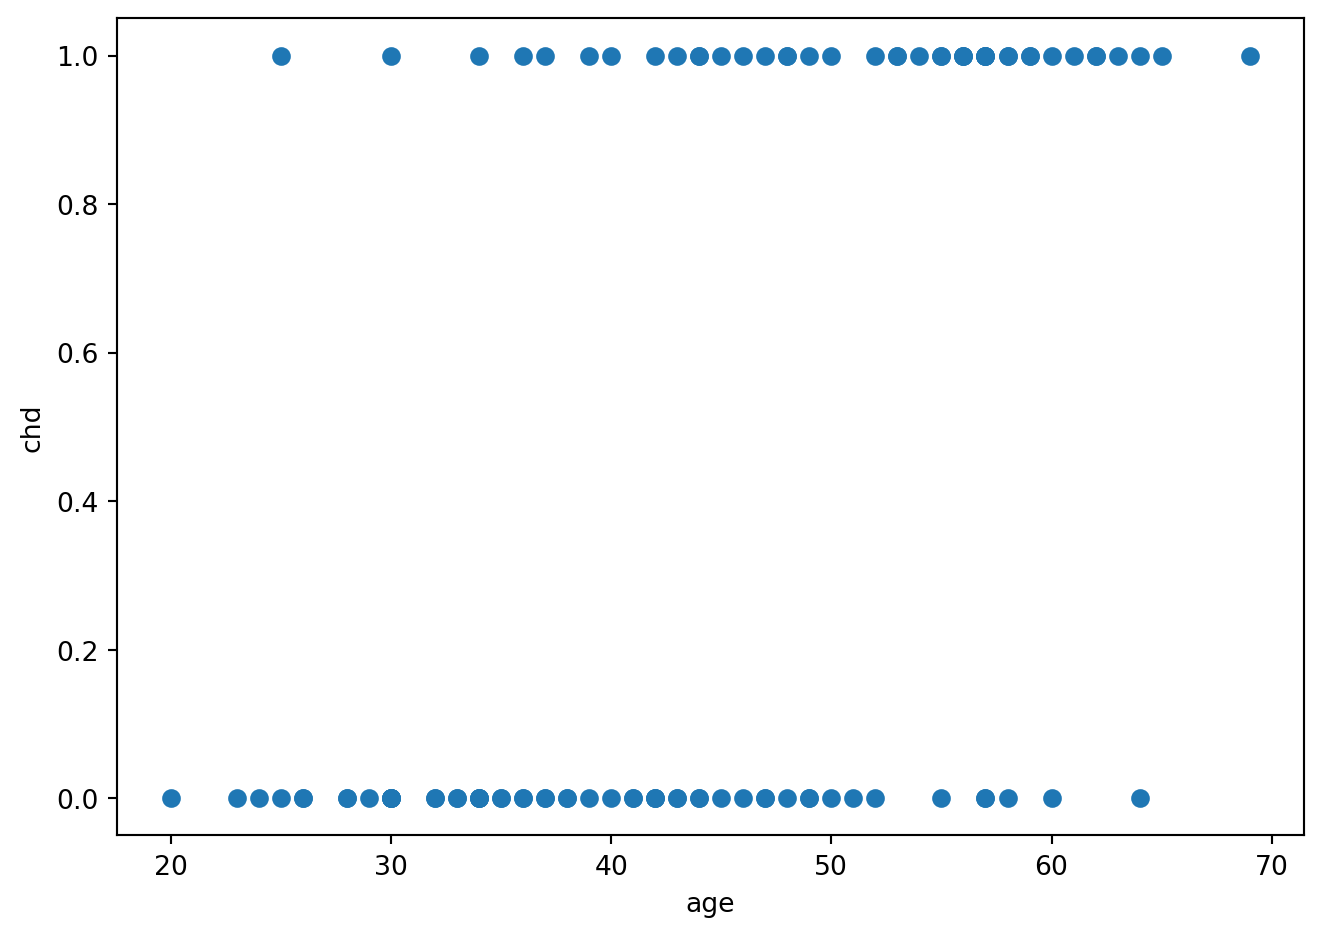

In [4]:
fig = plt.figure()
plt.plot(artere.age, artere.chd, 'o')
plt.ylabel('chd')
plt.xlabel('age')
fig.tight_layout()

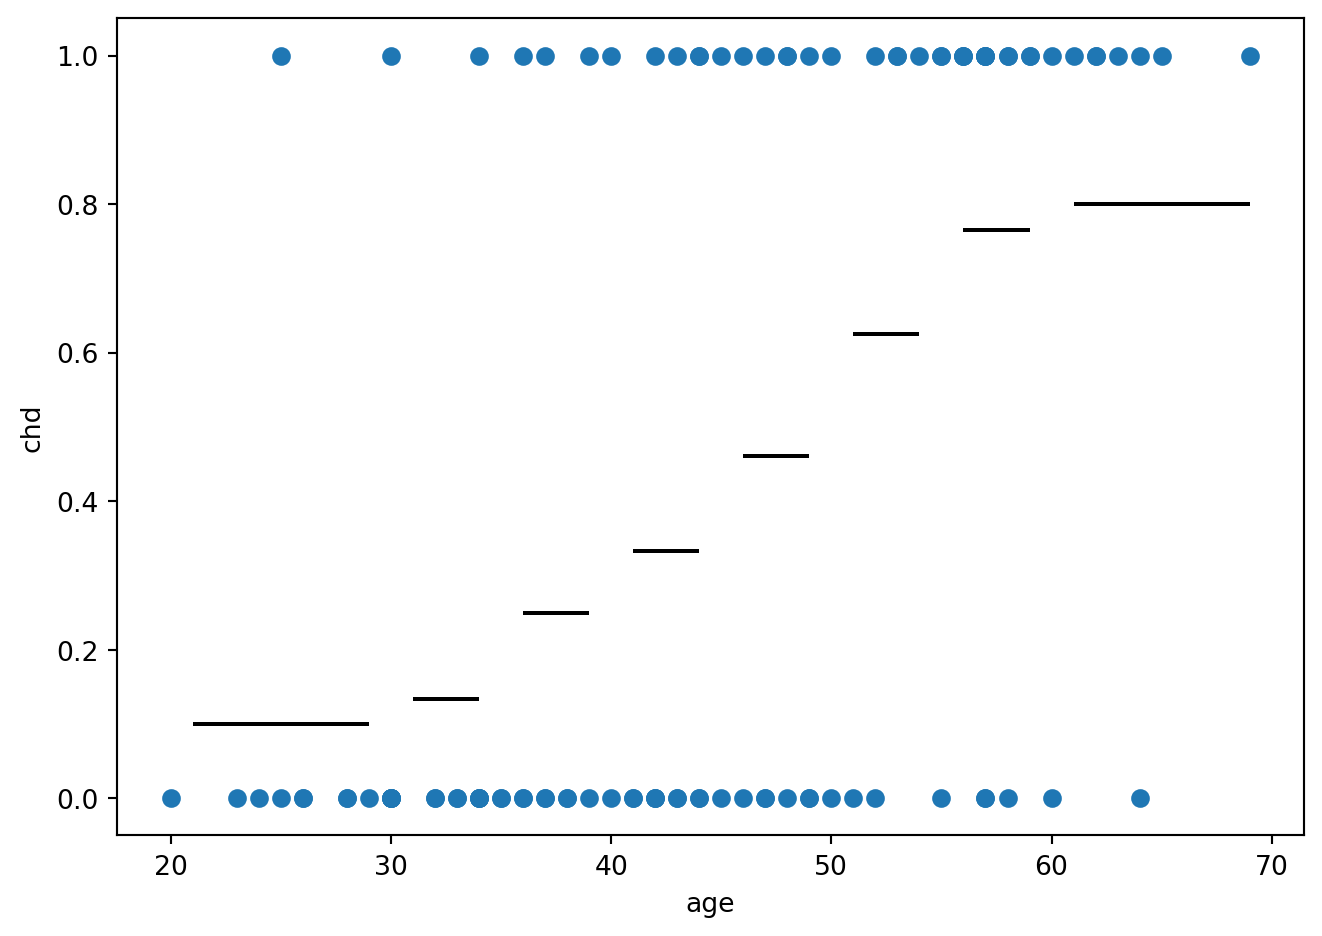

In [5]:
artere_summary = pd.crosstab(artere.agrp, artere.chd)
artere_summary.columns = ['chd0', 'chd1']
artere_summary['Effectifs'] = artere_summary.chd0 + artere_summary.chd1
artere_summary['Frequence'] = artere_summary.chd1 / artere_summary.Effectifs
artere_summary['age_min'] = [artere[artere.agrp == agrp].age.min() - 1 for agrp in artere_summary.index]
artere_summary['age_min'] = artere.groupby(["agrp"]).age.min() +1
artere_summary['age_max'] = [artere[artere.agrp == agrp].age.max() for agrp in artere_summary.index]
artere_summary['age_max'] = artere.groupby(["agrp"]).age.max()
artere_summary['age'] = [f']{artere_summary.age_min[i]};{artere_summary.age_max[i]}]' for i in artere_summary.index]
artere_summary['age'] = "]" + artere_summary.age_min.astype(str) + ";" + artere_summary.age_max.astype(str) + "]"
artere_summary.reset_index()[['age', 'Effectifs', 'chd0', 'chd1', 'Frequence']].to_string(index=False)


fig = plt.figure()
plt.plot(artere.age, artere.chd, 'o')
plt.ylabel('chd')
plt.xlabel('age')
plt.hlines(artere_summary.Frequence,artere_summary.age_min, artere_summary.age_max, 'k')
fig.tight_layout()

In [6]:
modele = smf.glm('chd~age', data=artere, family=sm.families.Binomial()).fit()
print(modele.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.677
Date:                Tue, 04 Feb 2025   Deviance:                       107.35
Time:                        18:32:49   Pearson chi2:                     102.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2541
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3095      1.134     -4.683      0.0

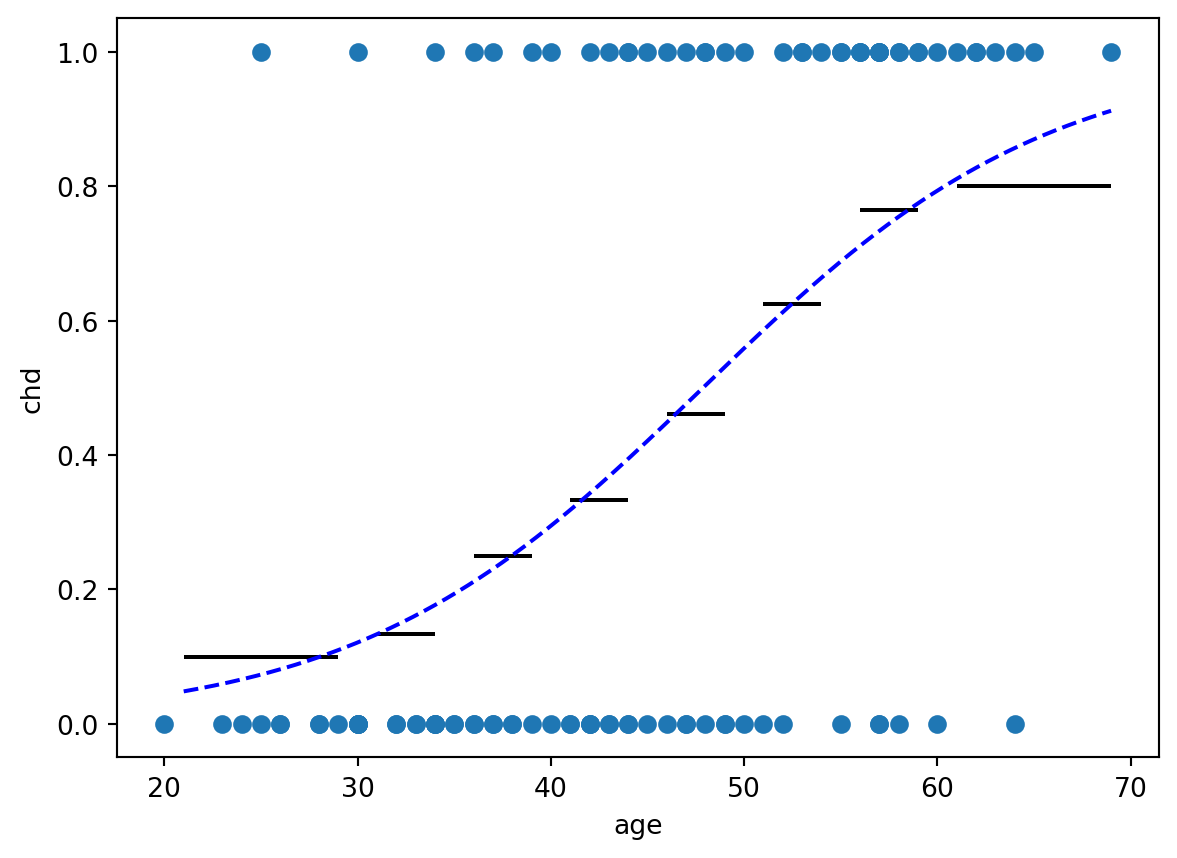

In [7]:
plt.plot(artere.age, artere.chd, 'o')
plt.ylabel('chd')
plt.xlabel('age')
plt.hlines(artere_summary.Frequence, artere_summary.age_min, artere_summary.age_max, 'k')
x = np.arange(artere_summary.age_min.min(), artere_summary.age_max.max(), step=0.01)
y = np.exp(modele.params.Intercept + modele.params.age * x) / (1.0 + np.exp(modele.params.Intercept + modele.params.age * x))
plt.plot(x, y, 'b--')
fig.tight_layout()

In [8]:
X = np.random.choice(['A', 'B', 'C'], 100)
Y = np.zeros(X.shape, dtype=int)
Y[X=='A'] = np.random.binomial(1, 0.9, (X=='A').sum())
Y[X=='B'] = np.random.binomial(1, 0.1, (X=='B').sum())
Y[X=='C'] = np.random.binomial(1, 0.9, (X=='C').sum())
don = pd.DataFrame({'X': X, 'Y': Y})

In [9]:
mod = smf.glm("Y~X", data=don, family=sm.families.Binomial()).fit()
print(mod.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.869
Date:                Tue, 04 Feb 2025   Deviance:                       27.738
Time:                        18:32:49   Pearson chi2:                     32.0
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6689
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5661   2.57e+04      0.001      0.9

In [10]:
mod1 = smf.glm("Y~C(X, Sum)", data=don, family=sm.families.Binomial()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.869
Date:                Tue, 04 Feb 2025   Deviance:                       27.738
Time:                        18:32:49   Pearson chi2:                     32.0
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6689
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5621   1.09e+04   5.16e

In [11]:
SAh = pd.read_csv("../donnees/SAh.csv", header=0, sep=",")
newSAh = SAh.iloc[[1,407,34],]
newSAh = newSAh.reset_index().drop("index",axis=1)
SAh = SAh.drop([1,407,34]).reset_index().drop("index",axis=1)

In [12]:
form ="chd ~ " + "+".join(SAh.columns[ :-1 ])
mod = smf.glm(form, data=SAh, family=sm.families.Binomial()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    chd   No. Observations:                  459
Model:                            GLM   Df Residuals:                      449
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -234.36
Date:                Tue, 04 Feb 2025   Deviance:                       468.72
Time:                        18:32:49   Pearson chi2:                     449.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2339
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.0837      1.314     -4.629      0.000      -8.659      -3.508
famhist[T.Present]     0.9325      0.229      4.069      0.000       0.483       1.382
sbp                    0.0065      0.006      1.127      0.260      -0.005       0.018
tobacco                0.0814      0.027      3.023      0.003       0.029       0.134
ldl                    0.1794      0.060      2.989      0.003       0.062       0.297
adiposity              0.0184      0.030      0.622      0.534      -0.039       0.076
typea                  0.0392      0.012      3.184      0.001       0.015       0.063
obesity               -0.0637      0.045     -1.430      0.153      -0.151       0.024
alcohol                0.0002      0.004      0.035      0.972      -0.009       0.009
age                    0.0439      0.012      3.592      0.000       0.020       0.068
======================================================================================
"""

In [13]:
print(mod.conf_int(alpha=0.05))

                           0         1
Intercept          -8.659355 -3.507984
famhist[T.Present]  0.483354  1.381573
sbp                -0.004798  0.017773
tobacco             0.028628  0.134174
ldl                 0.061771  0.297043
adiposity          -0.039461  0.076187
typea               0.015090  0.063396
obesity            -0.151055  0.023612
alcohol            -0.008640  0.008950
age                 0.019931  0.067793


In [14]:
don = pd.read_csv("../donnees/logit_donnees.csv", sep=",", header=0)
modsim = smf.logit("Y ~ X1 + X2 + X3", data=don).fit()

Optimization terminated successfully.
         Current function value: 0.366463
         Iterations 7


In [15]:
modsim.wald_test_terms()

/opt/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                 P>chi2  df constraint
Intercept   [[28.46981615119592]]  9.517067345514757e-08              1
X1         [[212.50601519640435]]  7.159869628652175e-47              2
X2         [[210.39004424749865]]  1.129196632385863e-47              1
X3         [[0.3095790886927727]]     0.5779385882309931              1

In [16]:
modsim01 = smf.logit("Y~X2+X3",data=don).fit()
modsim02 = smf.logit("Y~X1+X3",data=don).fit()
modsim03 = smf.logit("Y~X1+X2",data=don).fit()

Optimization terminated successfully.
         Current function value: 0.554834
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.366618
         Iterations 7


In [17]:
import statsmodels.regression.linear_model as smlm
smlm.RegressionResults.compare_lr_test(modsim,modsim01)

(376.7417147005359, 1.554447652669738e-82, 2.0)

In [18]:
smlm.RegressionResults.compare_lr_test(modsim,modsim02)

(417.66072160440774, 7.881723945480014e-93, 1.0)

In [19]:
smlm.RegressionResults.compare_lr_test(modsim,modsim03)

(0.3097619772612461, 0.5778262823265808, 1.0)

In [20]:
print(newSAh)

   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
1  200    19.20  4.43      40.60  Present     55    32.04    36.00   60    1
2  148     5.50  7.10      25.31   Absent     56    29.84     3.60   48    0


In [21]:
print(mod.predict(newSAh))

0    0.320889
1    0.881177
2    0.369329
dtype: float64


In [22]:
varbetac = mod.cov_params().values
betac = mod.params.values
ff = mod.model.formula.split("~")[1]
xetoile =  dmatrix("~"+ff, data=newSAh, return_type="dataframe").to_numpy()
prev_fit = np.dot(xetoile,betac)
prev_se = np.diag(np.dot(np.dot(xetoile,varbetac), np.transpose(xetoile)))**0.5
cl_inf = prev_fit-norm.ppf(0.975)*prev_se
cl_sup = prev_fit+norm.ppf(0.975)*prev_se
binf = np.exp(cl_inf)/(1+np.exp(cl_inf))
bsup = np.exp(cl_sup)/(1+np.exp(cl_sup))
print(pd.DataFrame({"binf": binf, "bsup": bsup}))

       binf      bsup
0  0.199717  0.472200
1  0.713881  0.956601
2  0.246181  0.512220


In [23]:
g = artere.groupby(["age"])
dfsat = pd.concat([g["chd"].mean(), g["chd"].count()], axis=1)
dfsat.columns = ["p", "n"]
print(dfsat.iloc[0:5])

       p  n
age        
20   0.0  1
23   0.0  1
24   0.0  1
25   0.5  2
26   0.0  2


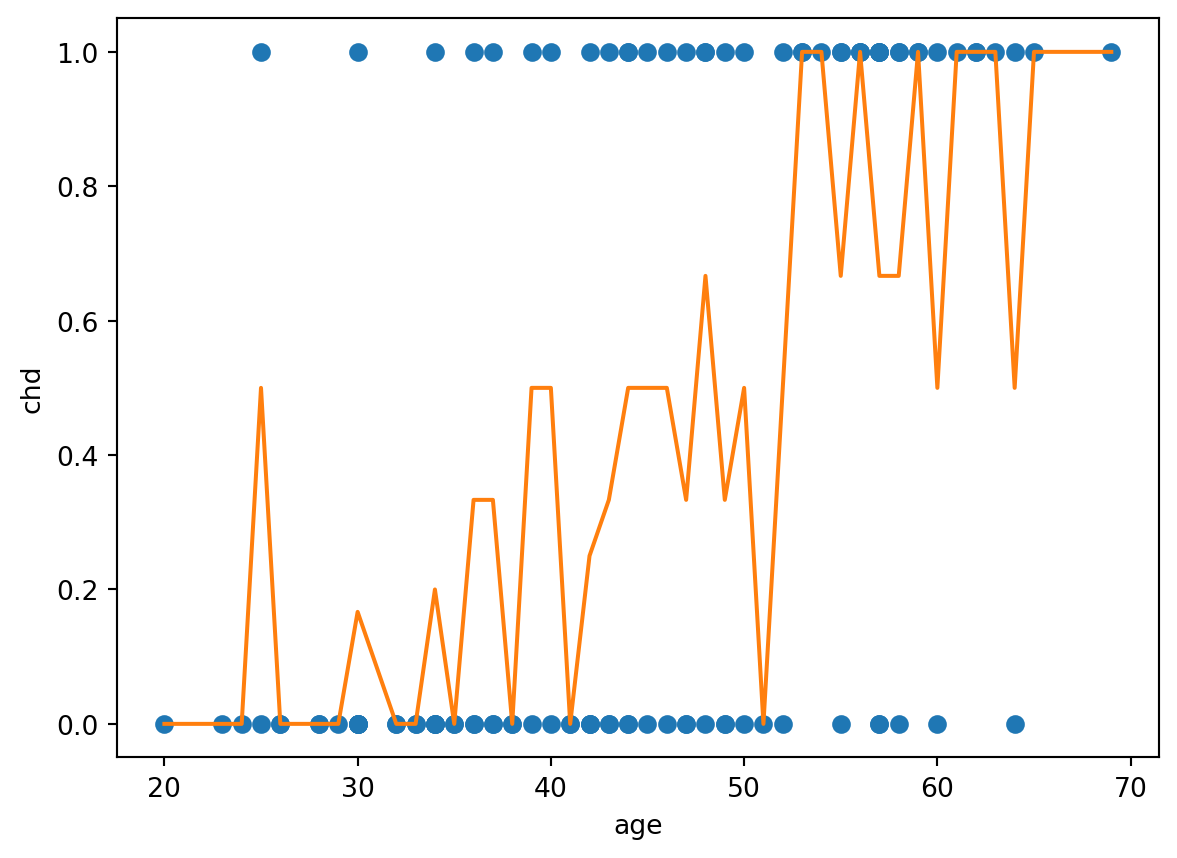

In [24]:
plt.plot(artere.age, artere.chd, 'o', dfsat.index, dfsat.p, "-")
plt.ylabel('chd')
plt.xlabel('age')
fig.tight_layout()

In [25]:
K=10
ajust = pd.DataFrame({"ajust": mod.predict()}, index=SAh.index)
ajust["Y"] = SAh["chd"]
ajust['decile'] = pd.qcut(ajust["ajust"], K)
ok = ajust['Y'].groupby(ajust.decile).sum()
muk = ajust["ajust"].groupby(ajust.decile).mean()
mk = ajust['Y'].groupby(ajust.decile).count()
C2 = ((ok - mk*muk)**2/(mk*muk*(1-muk))).sum()

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_95500/2496934923.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ok = ajust['Y'].groupby(ajust.decile).sum()
/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_95500/2496934923.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muk = ajust["ajust"].groupby(ajust.decile).mean()
/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_95500/2496934923.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to

In [26]:
print('chi-square: {:.3f}'.format(C2))

chi-square: 6.659


In [27]:
pvalue=1-chi2.cdf(C2, K-2)
print('p-value: {:.3f}'.format(pvalue))

p-value: 0.574


In [28]:
form ="chd ~ " + "+".join(SAh.columns[ :-1 ])
mod = smf.glm(form, data=SAh, family=sm.families.Binomial()).fit()

In [29]:
resdev = mod.resid_deviance/np.sqrt(1-mod.get_hat_matrix_diag())
respea = mod.resid_pearson/np.sqrt(1-mod.get_hat_matrix_diag())

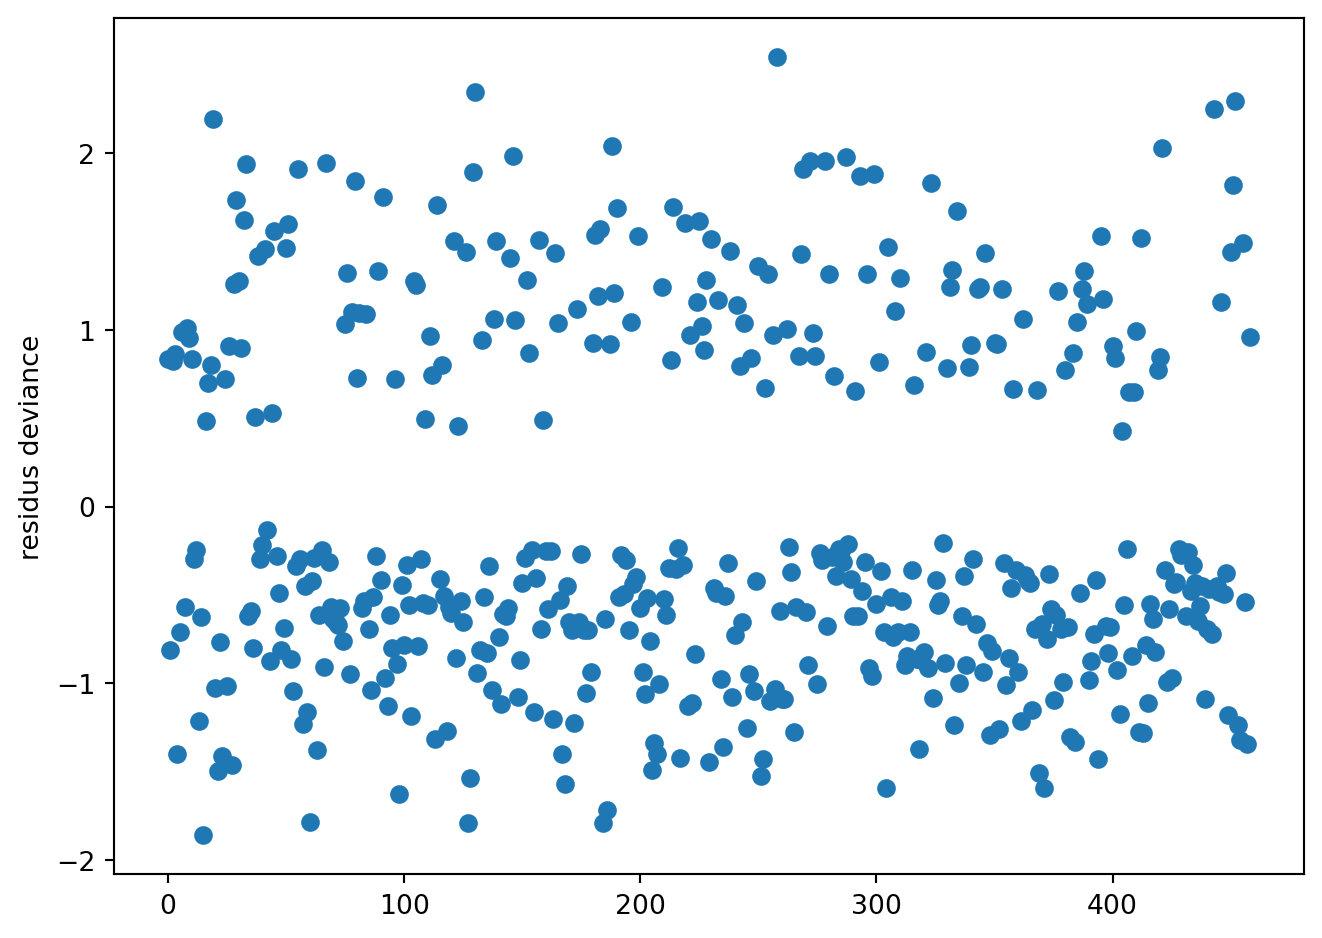

In [30]:
fig = plt.figure()
plt.plot(resdev, 'o')
plt.ylabel('residus deviance')
fig.tight_layout()

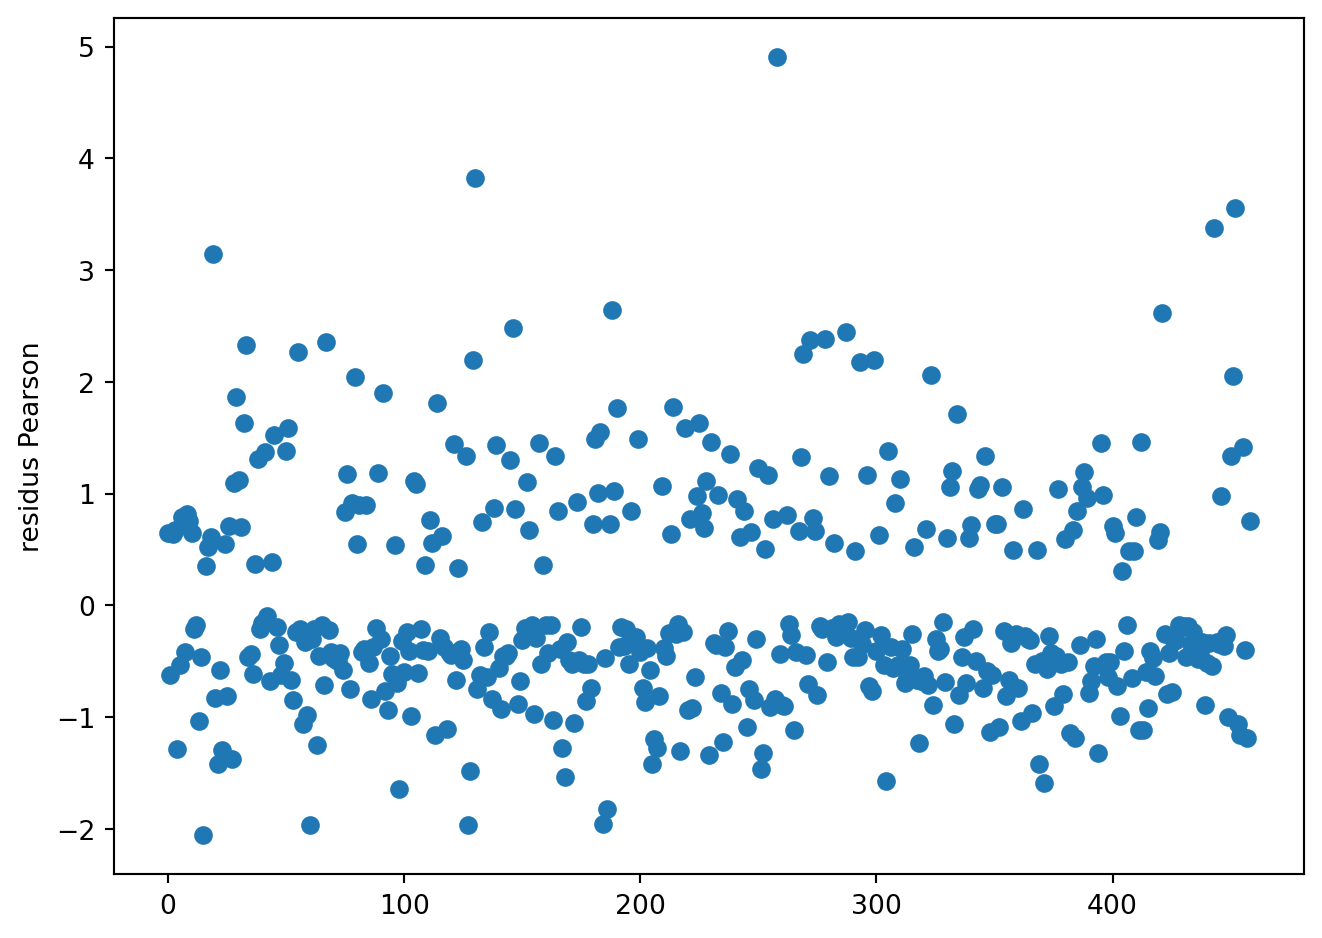

In [31]:
fig = plt.figure()
plt.plot(respea, 'o')
plt.ylabel('residus Pearson')
fig.tight_layout()

In [32]:
mod0 = smf.glm("chd~sbp+ldl", data=SAh, family=sm.families.Binomial()).fit()
mod1 = smf.glm("chd~sbp+ldl+famhist+alcohol", data=SAh, family=sm.families.Binomial()).fit()
def lr_test(restr, full):
    from scipy import stats
    lr_df = (restr.df_resid - full.df_resid)
    lr_stat = -2*(restr.llf - full.llf)
    lr_pvalue = stats.chi2.sf(lr_stat, df=lr_df)
    return {"lr": lr_stat, "pvalue": lr_pvalue, "df": lr_df}

lr_test(mod0, mod1)

{'lr': 25.5447172394405, 'pvalue': 2.838148600168801e-06, 'df': 2}

In [33]:
mod_sel = choixglmstats.bestglm(SAh, upper=form)

In [34]:
print(mod_sel.sort_values(by=["BIC","nb_var"]).iloc[:5,[1,3]])

                                        var_added         BIC
176           (tobacco, famhist, ldl, typea, age)  509.100392
287                (tobacco, famhist, typea, age)  512.495444
284                  (tobacco, famhist, ldl, age)  512.537897
91   (tobacco, famhist, ldl, typea, obesity, age)  513.424654
358                    (famhist, ldl, typea, age)  513.471151


In [35]:
print(mod_sel.sort_values(by=["AIC","nb_var"]).iloc[:5,[1,2]])

                                             var_added         AIC
176                (tobacco, famhist, ldl, typea, age)  484.326091
91        (tobacco, famhist, ldl, typea, obesity, age)  484.521302
36   (tobacco, famhist, ldl, typea, obesity, age, sbp)  485.117363
93            (tobacco, famhist, ldl, typea, age, sbp)  485.311962
31   (tobacco, famhist, adiposity, ldl, typea, obes...  486.031360
